## MISSION: 
<b>
Split the data set into training and testing components    
Train a Support Vector Machine algorithm and use the SVC model to predict the clusters of the testing component

## 0. LOAD DATA SET

In [5]:
clusters_0 = np.load('cluster1_answers.npy')
data_0 = np.load('cluster1_data_scaled.npy')
data_0[:10]

array([[ 0.10117974,  1.09312989],
       [-0.1344052 ,  1.01127634],
       [-0.08798433,  1.02087317],
       [ 0.02863047,  1.03105045],
       [ 0.15401246,  1.05586286],
       [ 0.18790678,  0.96940002],
       [-0.468706  ,  0.95380176],
       [-0.76232593,  1.15672593],
       [ 0.01109058,  0.91598746],
       [ 0.0210233 ,  0.9699809 ]])

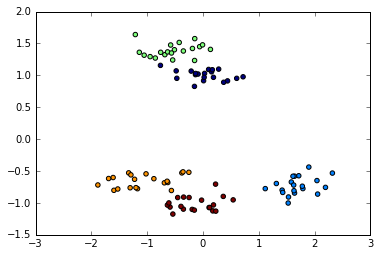

In [6]:
#to color each cluster, use c=clusters (clusters referanced above)
plt.scatter(data_0[:,0],data_0[:,1],c=clusters_0)
plt.show()

---

## 1. SLIT DATA INTO TRAINING AND TESTING SETS

In [10]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_0, clusters_0, test_size=0.33)

data = x_train
clusters = y_train

---

## 2. SUPPORT VECTOR CLASSIFICATION (SVC)
This method uses a linear kernel

><b>2a. CREATE AND FIT AN SVC INSTANCE

In [11]:
from sklearn import svm, datasets
svc = svm.SVC(kernel='linear',C=1.0).fit(data,clusters)
svc

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

><b>2b. PLOT THE SVC

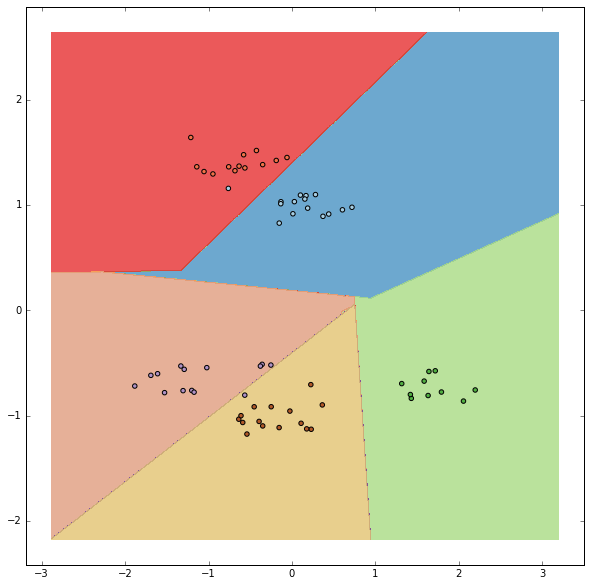

In [12]:
#CREATE A MESH
h = .002 # mesh step-size
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
x, y = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

#SHAPE THE MESH TO THE PREDICTIONS
z = svc.predict(np.c_[x.ravel(),y.ravel()])
z = z.reshape(x.shape)

#PLOT THE RESULTS
plt.rcParams['figure.figsize'] = (10,10)
plt.contourf(x, y, z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap=plt.cm.Paired)

plt.show()

---

>><b>SIDEQUEST: Lets put the above plotting technique into a function for easier later use:

In [13]:
def svcplot(svc,data,h_value):
    h = h_value
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    x, y = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    z = svc.predict(np.c_[x.ravel(),y.ravel()])
    z = z.reshape(x.shape)
    plt.contourf(x, y, z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap=plt.cm.Paired)
    plt.show()

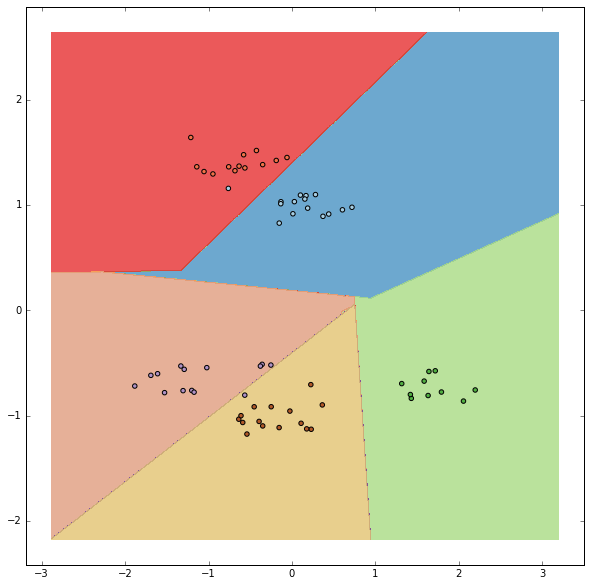

In [14]:
svcplot(svc,data,.002)

>><b>Now we have an easy way to do this throughout the project

---

><b>2c. COMPUTE THE THE PERCENTAGE OF POINTS THE ALGORITHM CORRECTLY CLASSIFIES

In [15]:
from sklearn.metrics import accuracy_score

predictions = svc.predict(data)
accuracy_score(clusters,predictions)

0.97014925373134331

><b>We're 97% accurate, Woohooo!

><b>BUT...That's still not 100%... This is a very neat and sterile dataset, I bet we can get our predictive prowess to 100. 

## 3. PARAMETER TUNING:

<b>PLAYING AROUND WITH SVM C-value</b>   
Low Value: Tries to capture majority of data points at expense of outliers. Could yeild a lower acccuracy on the training data, but end up more predicitve.        
High value: Tries to capture every individual element, including the outliers (This may contribute to overfitting the algorithm to the training data.)    
><b>Awesome explanation of this:   
http://stats.stackexchange.com/questions/31066/what-is-the-influence-of-c-in-svms-with-linear-kernel

#### THE FOLOWING CALCULATIONS SHOW THE PERCENTAGE OF POINTS IN THE TEST DATA THE SVC CORRECTLY CLASSIFIES GIVEN EACH C-VALUE

In [23]:
svc1_1 = svm.SVC(kernel='linear',C=.1).fit(data,clusters)
predictions1_1 = svc1_1.predict(data)
accuracy_score(clusters,predictions1_1)

0.89552238805970152

In [17]:
svc1_2 = svm.SVC(kernel='linear',C=.5).fit(data,clusters)
predictions1_2 = svc1_2.predict(data)
accuracy_score(clusters,predictions1_2)

0.92537313432835822

In [18]:
svc1_3 = svm.SVC(kernel='linear',C=3).fit(data,clusters)
predictions1_3 = svc1_3.predict(data)
accuracy_score(clusters,predictions1_3)

0.97014925373134331

In [40]:
svc2 = svm.SVC(kernel='linear',C=41.0).fit(data,clusters)
predictions2 = svc2.predict(data)
accuracy_score(clusters,predictions2)

1.0

><b>SVC2 is a BINGO! Let's see what these look like:

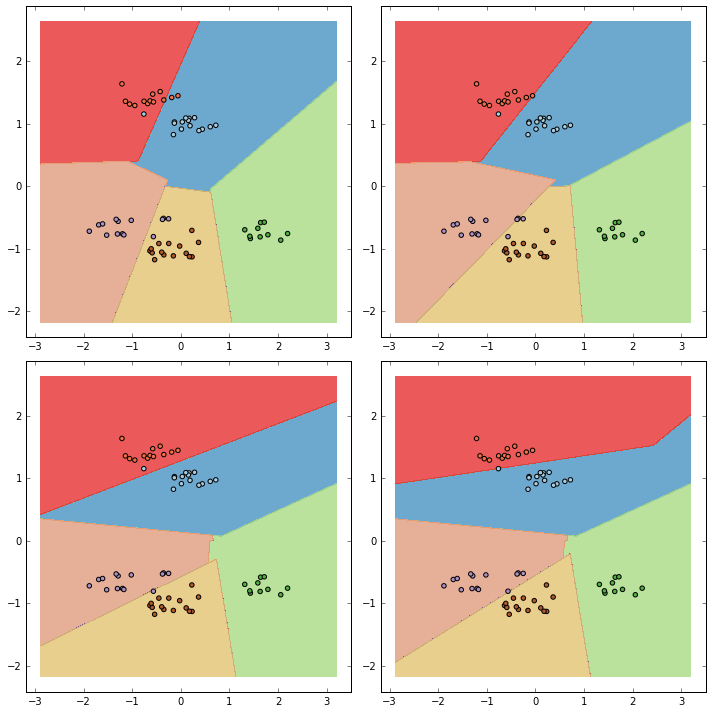

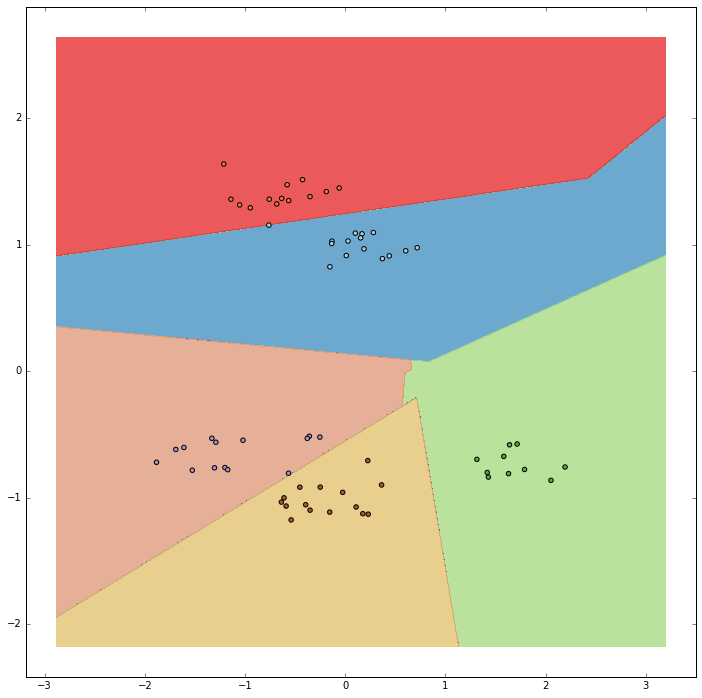

In [31]:
for i, clf in enumerate((svc1_1, svc1_2,svc1_3, svc2)):
    plt.subplot(2, 2, i + 1)
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    x, y = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    z = clf.predict(np.c_[x.ravel(),y.ravel()])
    z = z.reshape(x.shape)
    plt.contourf(x, y, z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap=plt.cm.Paired)
    
plt.tight_layout()
plt.show()
plt.rcParams['figure.figsize'] = (12,12)
svcplot(svc2,data,.002)

---

## 4. PREDICTION:

#### We will use the test data split off from the beginning of the mission and predict the clusters based on the x_test variable. The prediction will then be compared to y_test, which reprisents the actual clusters.

In [44]:
svc2 = svm.SVC(kernel='linear',C=38.0).fit(data,clusters)
predictions2 = svc2.predict(x_test)
accuracy_score(predictions2,y_test)

1.0

### The SVC has been tuned to predict the test clusters with 100% accuracy!

### BUT...

### Lets dig deeper into our validation strategy to discover how to optimize this algorithm even further

---

## CODEX:

In [1]:
from __future__ import division
import random
import numpy as np
from numpy import random, array, float
import matplotlib.pyplot as plt
%matplotlib inline